# Advanced Track 윤다인 Assignment 1

https://www.kaggle.com/datasets/mastmustu/income

Analyzing given data to find out the relationship between given factors and educational background, and </br>

predicting educational background by using those factors.

## 1. Visualization

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import plotly.graph_objs as go
from chart_studio.plotly import iplot
import chart_studio.plotly

In [3]:
import warnings
import csv

In [4]:
warnings.filterwarnings("ignore")
chart_studio.tools.set_credentials_file(username='ID', api_key='APIKKEY')

In [5]:
data_path='train.csv'

In [6]:
%matplotlib inline
from matplotlib import rc
import matplotlib.font_manager as fm
#fm._rebuild()
#fm.get_fontconfig_fonts()
#font_location = './NanumGothic.ttf' 
#font_name = fm.FontProperties(fname=font_location).get_name()
#mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus']=False

In [7]:
#READ DATA
train=pd.read_csv(data_path)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


# data preprocessing

In [9]:
new_names = {'income_>50K':'income'}
train = train.rename(columns=new_names)

#use only United-States -> do not use native-country colomn
#do not use edu-num == 1
train = train[train['native-country']=='United-States' ]
train = train[train['educational-num'] != 1]
train= train.drop('native-country', axis = 1)

train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,0


In [10]:
#NULL값 처리

train['workclass'] = train['workclass'].fillna('None')
train['occupation'] = train['occupation'].fillna('None')
#train['native-country'] = train['native-country'].fillna('Others')
train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

In [11]:
#bundle up education-num by education

def edufunc(x):
    if x in [2,3]:
        return 0
        # return 'ES'
    elif x in [4,5]:
        return 1
        # return 'MS'
    elif x in [6,7,8]:
        return 2
        # return 'HS'
    elif x == 9:
        return 3
        # return 'HS-grad'
    elif x == 10:
        return 4
        # return 'Some-college'
    elif x == 11:
        return 5
        # return 'Assoc-voc'
    elif x == 12:
        return 6
        # return 'Assoc-acdm'
    elif x == 13:
        return 7
        # return 'Bachelors'
    elif x == 14:
        return 8
        # return 'Masters'
    elif x == 15:
        return 9
        # return 'Prof-school'
    elif x == 16:
        return 10
        # return 'Doctorate'
    
train['educational-num'] = train['educational-num'].map(edufunc)
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,67,Private,366425,Doctorate,10,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,1
1,17,Private,244602,12th,2,Never-married,Other-service,Own-child,White,Male,0,0,15,0
2,31,Private,174201,Bachelors,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,1
3,58,State-gov,110199,7th-8th,1,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,0
4,25,State-gov,149248,Some-college,4,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,0


## Why not using Race Column
we can check that race columns have to much white values, which could cause bias on result

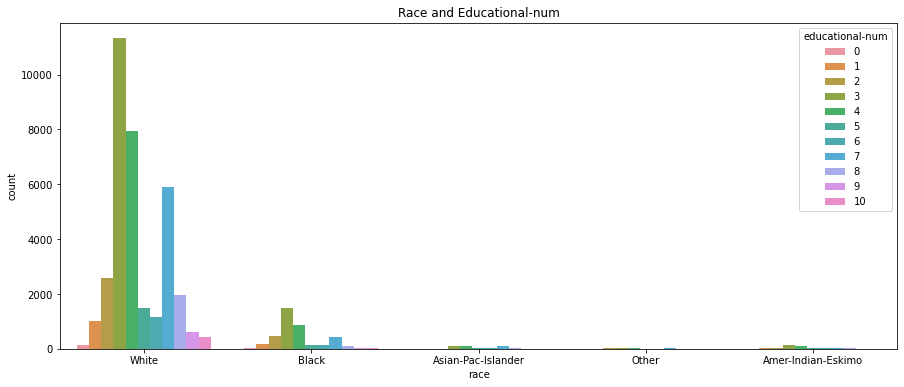

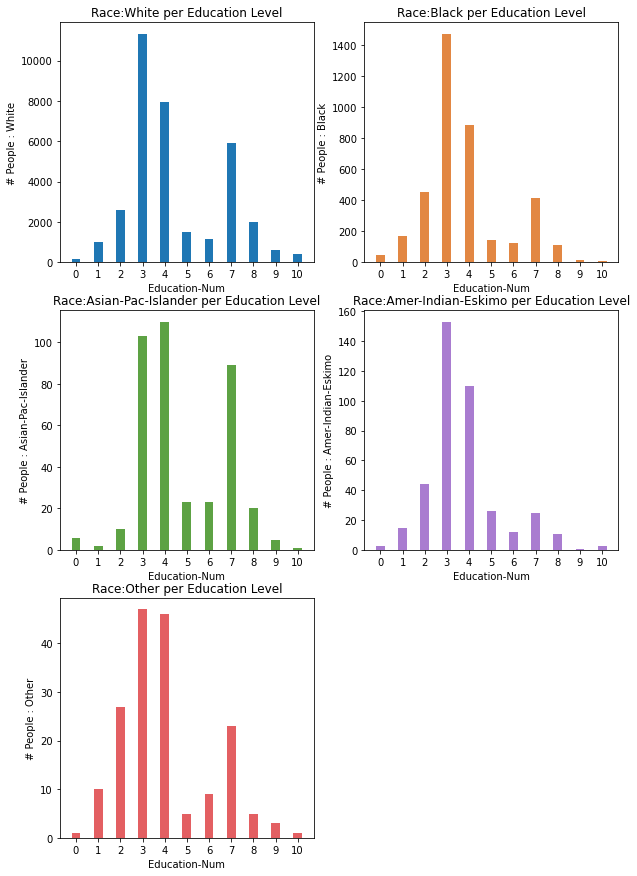

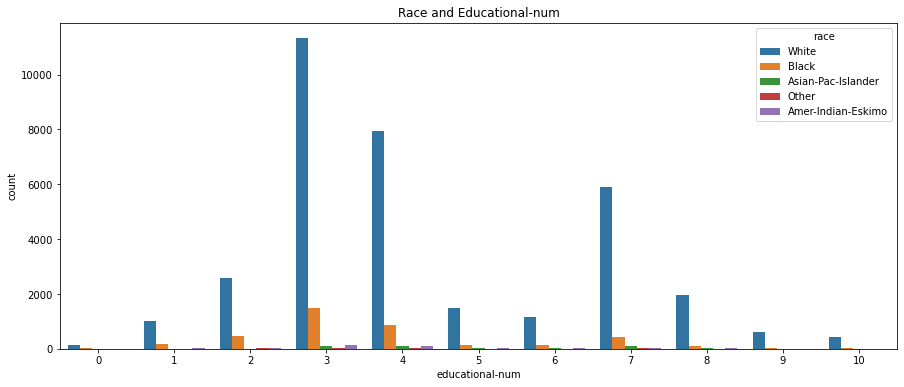

In [12]:
#RELATION BETWEEN EDUCATIONAL-NUM AND RACE
pd.set_option('display.max_colwidth', -1)

##DATA 가공
race_education=pd.DataFrame(train.groupby('educational-num')['race'].count())
#display(race_education)

pwhite=pd.DataFrame(train[train.race=='White'].groupby('educational-num')['race'].count())
pblack=pd.DataFrame(train[train.race=='Black'].groupby('educational-num')['race'].count())
pasian=pd.DataFrame(train[train.race=='Asian-Pac-Islander'].groupby('educational-num')['race'].count())
peskimo=pd.DataFrame(train[train.race=='Amer-Indian-Eskimo'].groupby('educational-num')['race'].count())
pother=pd.DataFrame(train[train.race=='Other'].groupby('educational-num')['race'].count())

pwhite.rename(columns={'race':'White'}, inplace=True)
pblack.rename(columns={'race':'Black'}, inplace=True)
pasian.rename(columns={'race':'AsianPacIslander'}, inplace=True)
peskimo.rename(columns={'race':'AmerIndianEskimo'}, inplace=True)
pother.rename(columns={'race':'Other'}, inplace=True)

#display(pwhite)
#display(pblack)
#display(pasian)
#display(peskimo)
#display(pother)


##각 race 별 edu
fig = plt.figure(figsize=(15,6))
plt.title('Race and Educational-num')
sns.countplot(data=train, x="race", hue="educational-num")
plt.show()

##각 race와 educational-num graph
race_education.index=['0','1','2','3','4','5','6','7','8','9','10']

fig = plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.title('Race:White per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : White')
x=np.arange(11)
plt.bar(x, pwhite.White, width=0.4)
plt.xticks(x, race_education.index)

plt.subplot(3,2,2)
plt.title('Race:Black per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Black')
x=np.arange(11)
plt.bar(x, pblack.Black, width=0.4, color='#e28743')
plt.xticks(x, race_education.index)

plt.subplot(3,2,3)
plt.title('Race:Asian-Pac-Islander per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Asian-Pac-Islander')
x=np.arange(11)
plt.bar(x, pasian.AsianPacIslander, width=0.4, color='#5da244')
plt.xticks(x, race_education.index)

plt.subplot(3,2,4)
plt.title('Race:Amer-Indian-Eskimo per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Amer-Indian-Eskimo')
x=np.arange(11)
plt.bar(x, peskimo.AmerIndianEskimo, width=0.4, color='#a97cd0')
plt.xticks(x, race_education.index)

plt.subplot(3,2,5)
plt.title('Race:Other per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : Other')
x=np.arange(11)
plt.bar(x, pother.Other, width=0.4, color='#e35f62')
plt.xticks(x, race_education.index)

plt.show()

##전체 합한 그래프
fig = plt.figure(figsize=(15,6))
plt.title('Race and Educational-num')
sns.countplot(data=train, x="educational-num", hue="race")
plt.show()

## Percentage of each Education-num

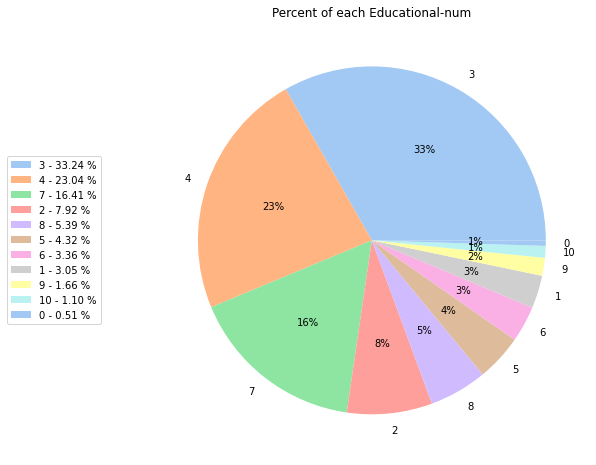

In [13]:
##각 학력 별 %


#많은 수대로 나열
educations=pd.DataFrame(train.groupby('educational-num').count())
educations=educations.sort_values(by=['age'], axis=0, ascending=False)
#display(educations)

colors = sns.color_palette('pastel')[0:15]

fig = plt.figure(figsize=(8,8))
pie=plt.pie(educations.age, labels=educations.index, colors=colors, autopct='%.0f%%')
plt.title("Percent of each Educational-num")

y=educations.age
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(educations.index, porcent)]

plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=10)
plt.show()


## Income per Education-num

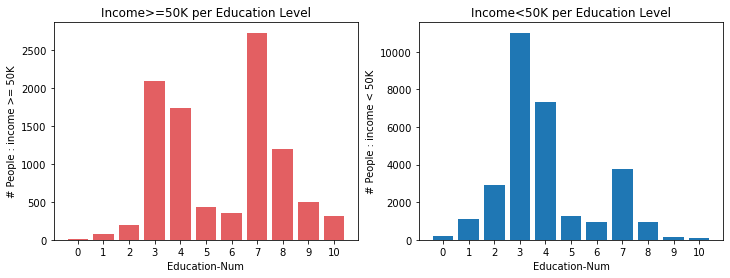

<AxesSubplot:title={'center':'Income and Educational-num'}, xlabel='educational-num', ylabel='count'>

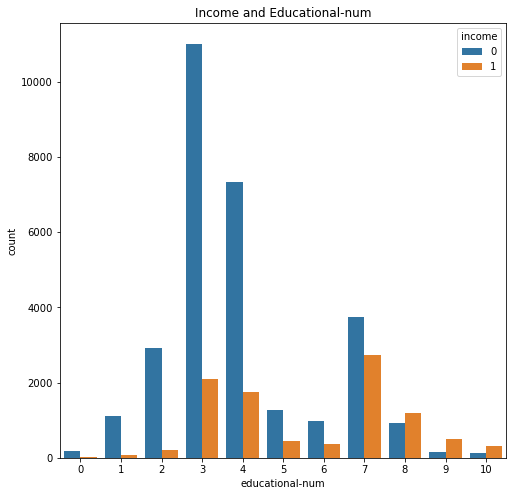

In [14]:
#RELATION BETWEEN EDUCATIONAL-NUM AND INCOME

pd.set_option('display.max_colwidth', 50)

##DATA 가공
incomes = pd.Series(train['income'])

'''
edu = pd.Series(train['educational-num'])
display(incomes)
display(edu)

display(incomes.index)
display(incomes.values)
'''

income_education=pd.DataFrame(train.groupby('educational-num')['income'].count())
#display(income_education)


more50=pd.DataFrame(train[train.income==1].groupby('educational-num')['income'].count())
less50=pd.DataFrame(train[train.income==0].groupby('educational-num')['income'].count())

more50.rename(columns={'income':'incomeup'}, inplace=True)
less50.rename(columns={'income':'incomedown'}, inplace=True)
#display(more50)
#display(less50)

'''
more50_arr=incomes.loc[incomes.values == 1]
more50_num=more50_arr.index
display(more50_arr)
display(more50_num)
'''

##MERGE MORE50K & LESS50K
incomereturn = pd.merge(more50, less50, on='educational-num')
#display(incomereturn)

##income과 educational-num graph
income_education.index=['0','1','2','3','4','5','6','7','8','9','10']

fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Income>=50K per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : income >= 50K')
x=np.arange(11)
plt.bar(x, more50.incomeup, color='#e35f62')
plt.xticks(x, income_education.index)

plt.subplot(1,2,2)
plt.title('Income<50K per Education Level')
plt.xlabel('Education-Num')
plt.ylabel('# People : income < 50K')
x=np.arange(11)
plt.bar(x, less50.incomedown)
plt.xticks(x, income_education.index)
plt.show()


fig = plt.figure(figsize=(8,8))
plt.title('Income and Educational-num')
sns.countplot(data=train, x="educational-num", hue="income")

## Hours-per-week per Education-num

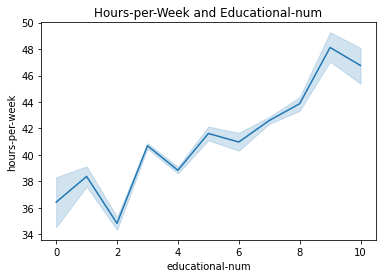

'Colored part: 95% confidence in average.'

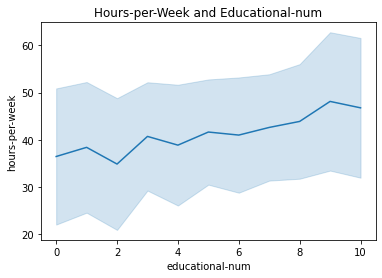

'Colored part: 95% confidence interval of the standard deviation.'

In [15]:
#RELATION BETWEEN EDUCATIONAL-NUM AND HOURS-PER-WEEK
##다시?

##DATA 가공
hours_education=pd.DataFrame(train.groupby('educational-num')['hours-per-week'].count())
#display(hours_education)

#hours-per-week는 각 시간을 10의 단위로 범주화 할 것??

plt.title('Hours-per-Week and Educational-num')
sns.lineplot(data=train, x="educational-num", y="hours-per-week")
plt.show()
display("Colored part: 95% confidence in average.")

plt.title('Hours-per-Week and Educational-num')
#sns.relplot(data=train, x="educational-num", y="hours-per-week", kind='line', ci= 'sd')
sns.lineplot(data=train, x="educational-num", y="hours-per-week", ci='sd')
plt.show()
display("Colored part: 95% confidence interval of the standard deviation.")

#sns.lmplot(data=train, x="educational-num", y="hours-per-week")

## Occupation per Education-num

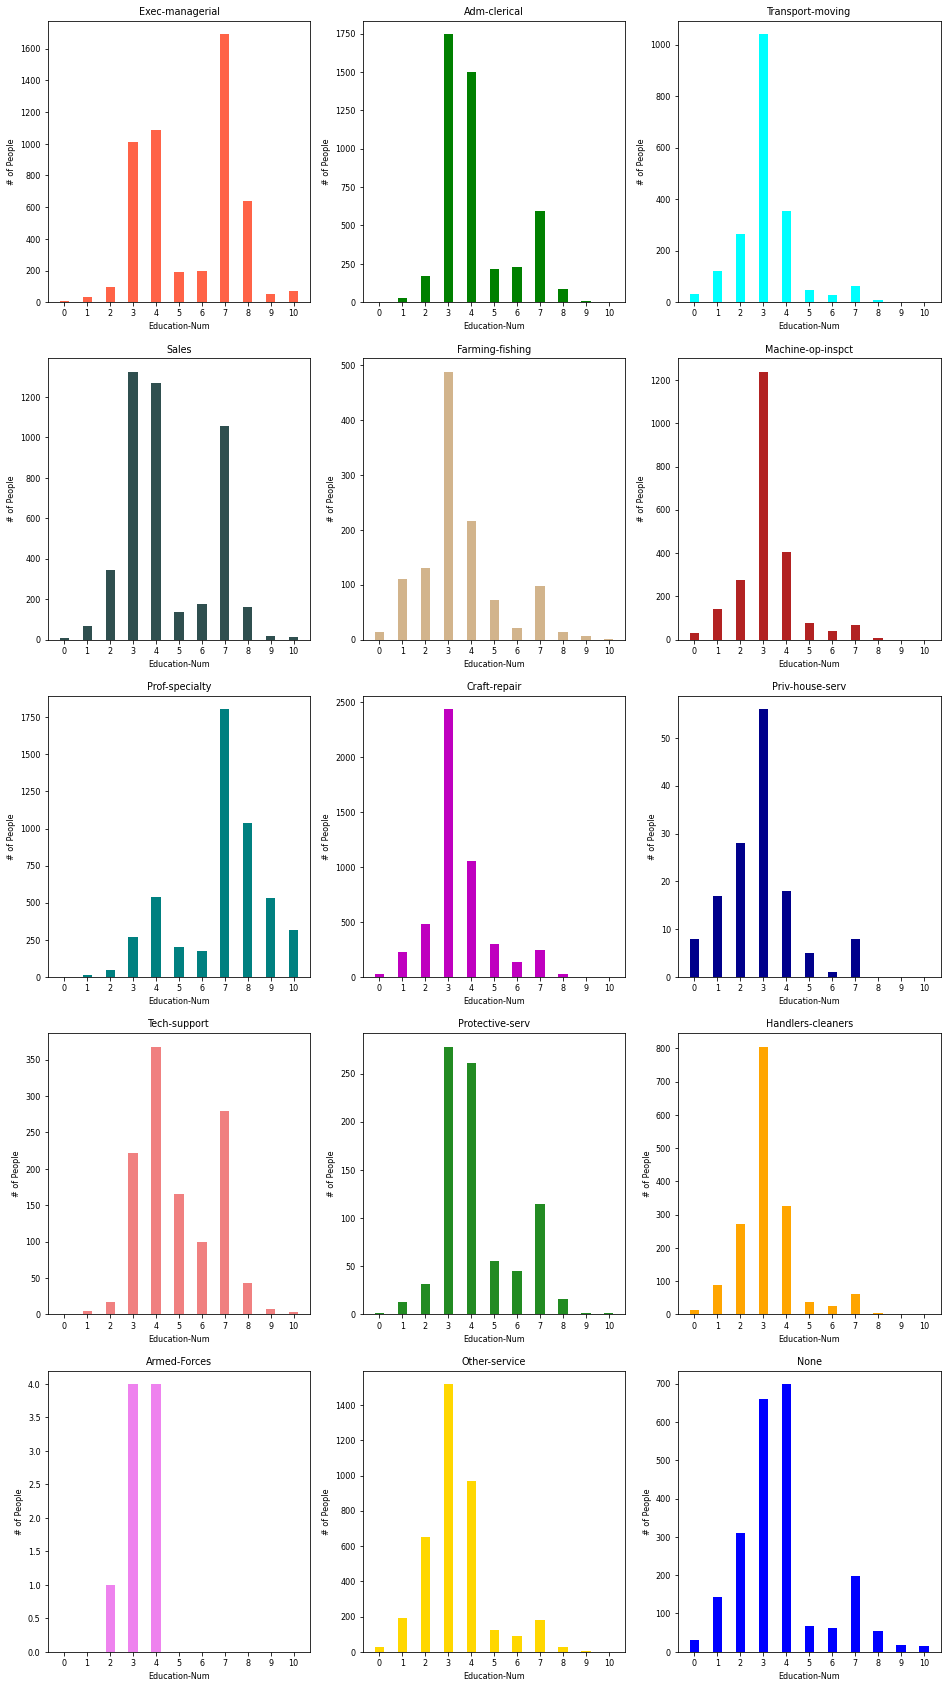

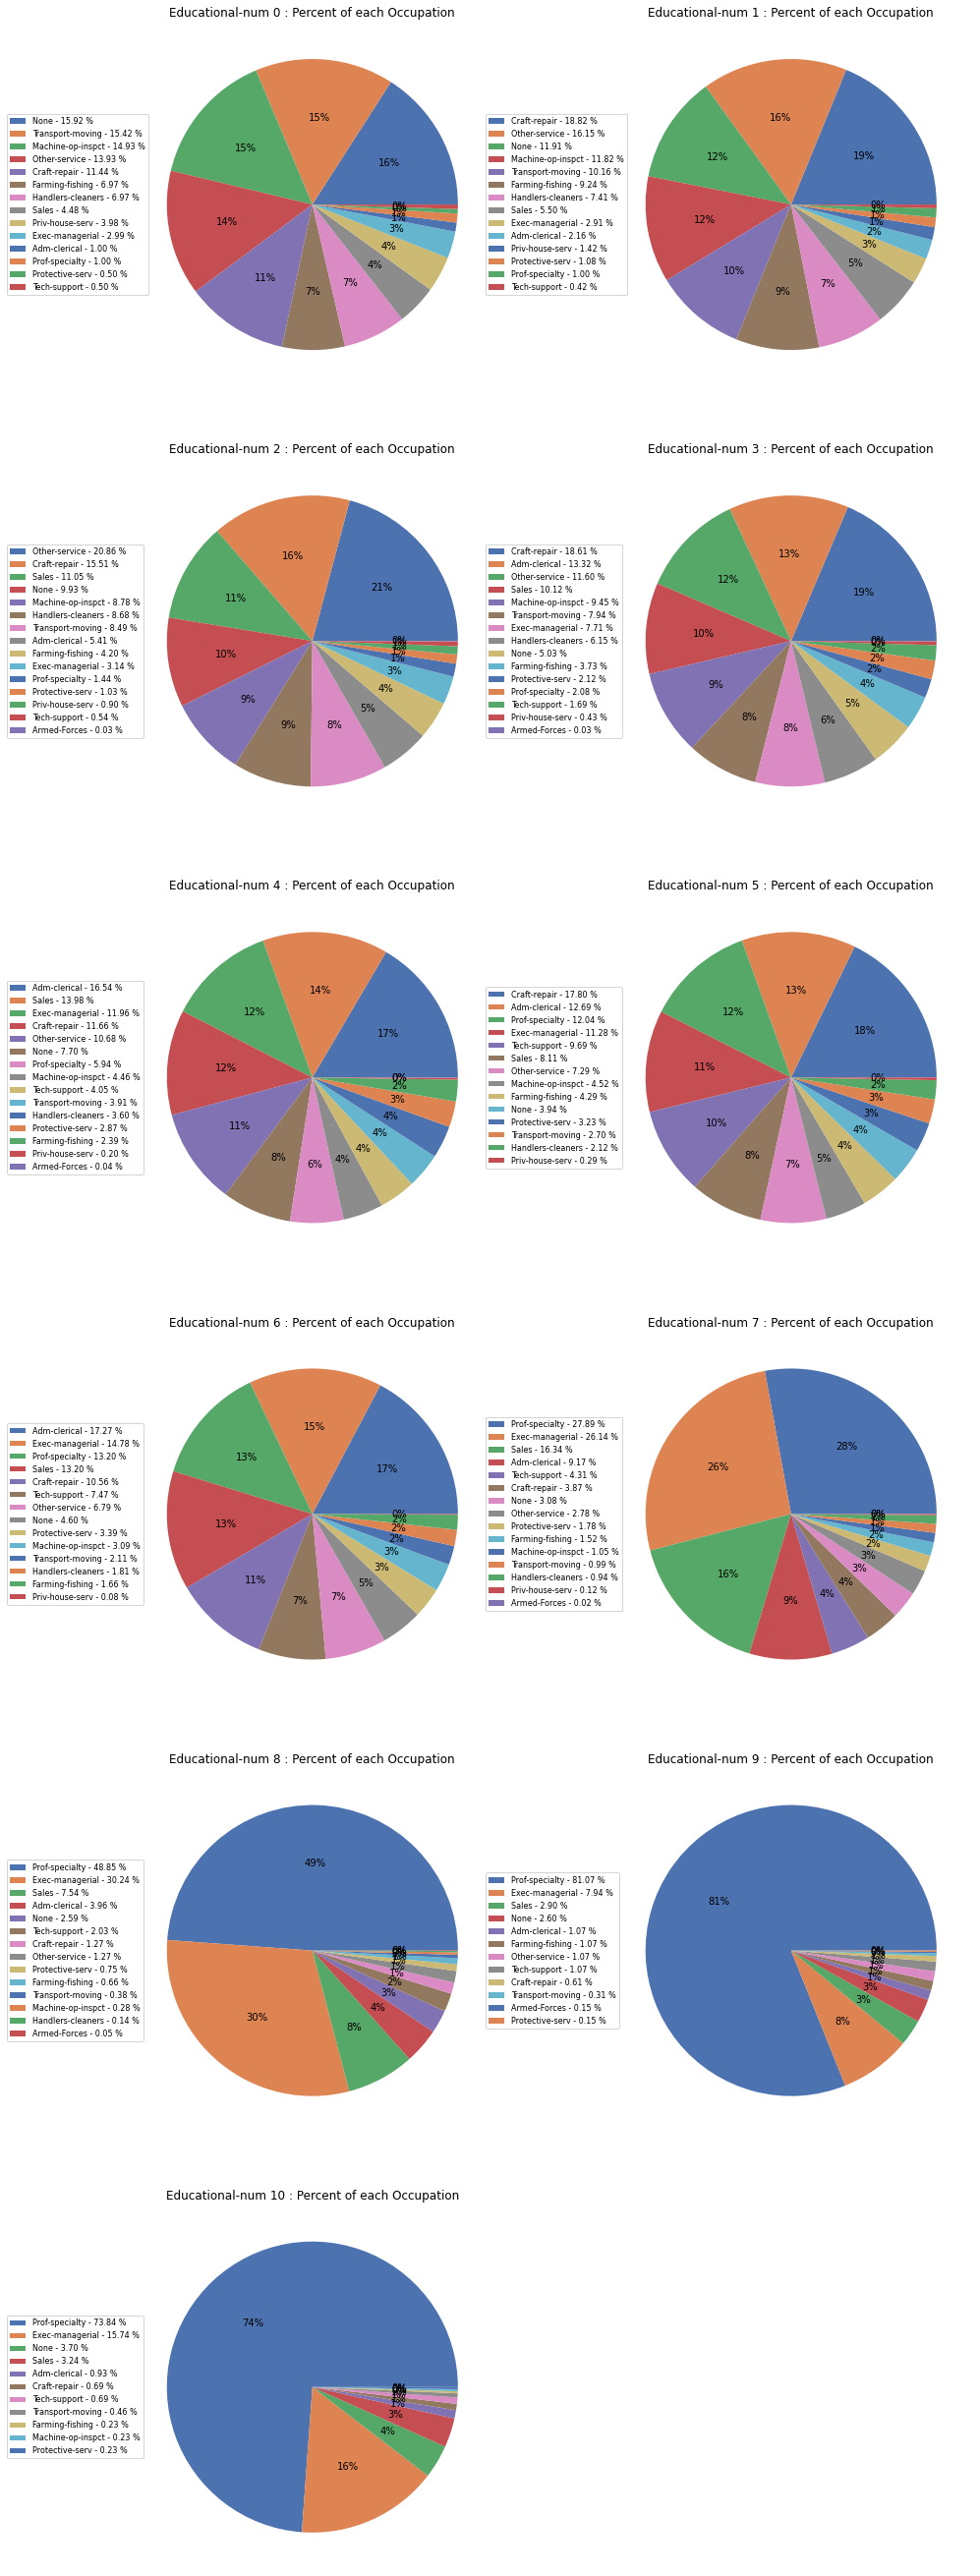

In [16]:
#RELATION BETWEEN EDUCATIONAL-NUM AND OCCUPATION

##DATA 가공
occupation_edu=pd.DataFrame(train.groupby('educational-num')['occupation'].count())
#display(occupation_edu)

'''
fig = plt.figure(figsize=(8,8))
plt.title('Occupation and Educational-num')
sns.countplot(data=train, x="educational-num", hue="occupation")
plt.show()
#display(train.occupation)
'''

occu = pd.Series(train['occupation'])
#display(occu)


#copy the train : df
##rip off the columns that we need
df = train

from io import StringIO

col = ['educational-num', 'occupation']
df = df[col]

new_names = {'educational-num':'edu_num'}
df = df.rename(columns=new_names)
df.head()



##각 직업 별 학력 그래프
#occupation_edu.index=['0','1','2','3','4','5','6','7','8','9','10']

##각 직업 리스트로 표기
occu_name=['Exec-managerial','Adm-clerical','Transport-moving','Sales','Farming-fishing','Machine-op-inspct','Prof-specialty',
          'Craft-repair','Priv-house-serv','Tech-support','Protective-serv','Handlers-cleaners','Armed-Forces','Other-service','None']

##그래프 그리기
fig = plt.figure(figsize=(16,30))
plt.rc('font', size=8)
coloring=['tomato', 'green', 'aqua', 'darkslategrey', 'tan', 'firebrick', 'teal', 'm', 'darkblue', 'lightcoral',
         'forestgreen', 'orange', 'violet', 'gold', 'blue']

for i in range(0, 15):
    plt.subplot(5,3,i+1)
    pExec=pd.DataFrame(df[df.occupation==occu_name[i]].groupby('edu_num')['occupation'].count())
    pExec.rename(columns={'occupation':'occ'}, inplace=True)
    #pExec=np.array(occupation_edu.index, pExec.index, pExec.occ)
    #display(pExec)
    
    #flag=pExec.occ
    #display(flag)

    #pExec['id']=pExec['edu_num'].factorize()[0]
    #pExec['id']=pExec.index
    #category_id_df = pExec[pExec.index, 'id'].drop_duplicates().sort_values('id')
    #category_to_id = dict(category_id_df.values)
    #id_to_category = dict(category_id_df[['id', 'edu_num']].values)
    
    
    pExec["id"] = np.arange(len(pExec))
    
    for j in range(len(pExec)):
        pExec.id = pExec.index
    

    k = 0
    for j in range(len(pExec)):
        if(pExec.index[k] == j):
            k += 1
            continue
        else:
            #a_row = pd.Series({'occ':0})
            #temp = pd.DataFrame([a_row], index = [k])
            #pExec = pd.concat([temp, pExec])
            pExec.loc[k]=[0,k]
            pExec=pExec.sort_index()
            k += 1
    
    if(k<11) :
        for m in range(k, 11):
            #a_row = pd.Series({'occ':0})
            #temp = pd.DataFrame([a_row], id=m)
            #pExec = pd.concat([temp, pExec])
            #pExec=pExec.sort_index()
            pExec.loc[k]=[0,k]
            pExec=pExec.sort_index()
            k += 1
    
    #display(pExec)

            
    plt.title(occu_name[i])
    plt.xlabel('Education-Num')
    plt.ylabel('# of People')
    x=np.arange(11)
    plt.bar(x, pExec.occ, width=0.4, color=coloring[i])
    plt.xticks(x, pExec.index)


plt.show()



#RELATION BETWEEN EDUCATIONAL-NUM AND OCCUPATION - PART 2
##각 학력 별 직업 파이그래프

colors = sns.color_palette('deep')[0:15]

fig = plt.figure(figsize=(16,64))
for i in range(0, 11):
    plt.subplot(8,2,i+1)
    plt.rc('font', size=10) 
    plt.xticks(rotation=90)
    p=pd.DataFrame(df[df.edu_num==i].groupby('occupation')['edu_num'].count())
    #p=pd.DataFrame(df[df.edu_num==i].groupby('race')['educational-num'].count())
    p=p.sort_values(by=['edu_num'], axis=0, ascending=False)
    #display(p)
    pie=plt.pie(p.edu_num, colors=colors, autopct='%.0f%%')
    plt.title("Educational-num %i : Percent of each Occupation" %i)
    
    y=p.edu_num
    porcent = 100.*y/y.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(p.index, porcent)]

    slices = np.arange(p.edu_num.count())
    #plt.tight_layout()
    plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
      
plt.show()



## Relationship per Education-num

,Unmarried,Not-in-family,Own-child,Other-relative,Married-couple
0,24,55,10,4,108
1,134,268,127,36,636
2,355,597,1055,137,977
3,1598,3223,1931,435,5912
4,951,2306,2148,200,3474
5,229,456,170,24,823
6,160,400,163,24,579
7,396,2029,640,89,3314
8,166,664,64,14,1215
9,26,149,12,5,463


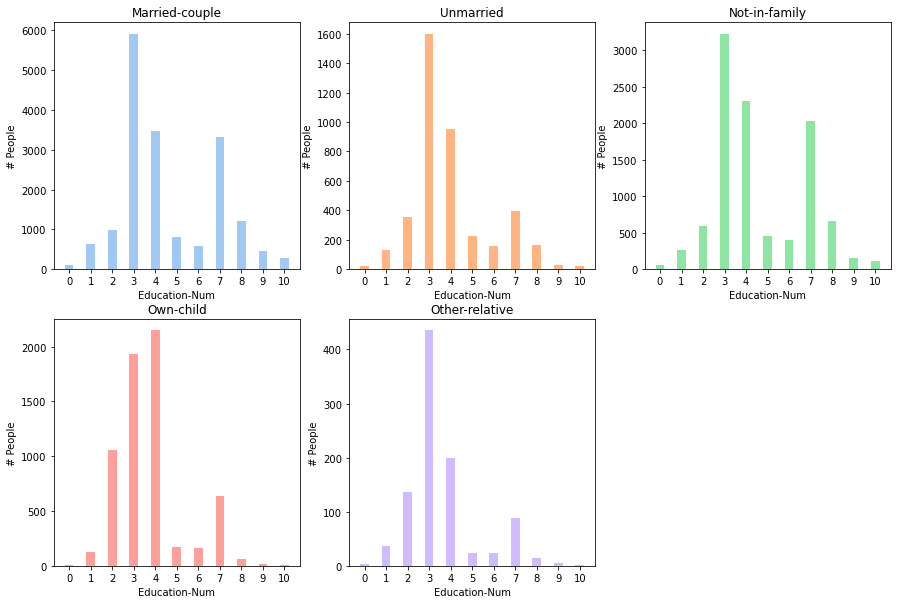

'\n\nfig = plt.figure(figsize=(15,6))\nplt.title(\'Relationship and Educational-num\')\nsns.countplot(data=df2, x="id", hue=label)\nplt.show()\n\n\ncolors = sns.color_palette("Set3", 6)\n\nfig = plt.figure(figsize=(16,64))\nfor i in range(0, 11):\n    plt.subplot(8,2,i+1)\n    plt.rc(\'font\', size=10) \n    plt.xticks(rotation=90)\n    #p1=pd.DataFrame(df[df.edu_num==1].groupby(\'occupation\')[\'edu_num\'].count())\n    p=pd.DataFrame(df[df.edu_num==i].groupby(\'relationship\')[\'edu_num\'].count())\n    p=p.sort_values(by=[\'edu_num\'], axis=0, ascending=False)\n    #display(p)\n    pie=plt.pie(p.edu_num, colors=colors, autopct=\'%.0f%%\')\n    plt.title("Educational-num %i : Percent of each Relationship" %i)\n\n    y=p.edu_num\n    porcent = 100.*y/y.sum()\n    labels = [\'{0} - {1:1.2f} %\'.format(i,j) for i,j in zip(p.index, porcent)]\n    \n    plt.legend(pie, labels=labels, loc=\'center left\', bbox_to_anchor=(-0.35, .5), fontsize=8)\n      \nplt.show()\n\n'

In [17]:
#RELATIONSHIP BETWEEN EDUCATIONAL-NUM AND RELATIONSHIP

#필요한 값만 가져오기
rel_name=['Husband', 'Wife', 'Unmarried', 'Not-in-family', 'Own-child', 'Other-relative']

df2 = pd.DataFrame(index=range(0,11))

for i in range (len(rel_name)):
    a=pd.DataFrame(train[train.relationship==rel_name[i]].groupby('educational-num')['relationship'].count())
    #a.rename(columns={'relationship':rel_name[i]}, inplace=True)
    add_col=a['relationship'].values
    df2[rel_name[i]]=add_col
    #df2 = pd.merge(df2, x, on=df2.index)
    
add_col=df2['Husband'].values + df2['Wife'].values
df2['Married-couple']=add_col

df2= df2.drop('Husband', axis = 1)
df2= df2.drop('Wife', axis = 1)

#df2["id"] = np.arange(len(df2))
display(df2)

fig = plt.figure(figsize=(15,10))
label = ["Married-couple", "Unmarried", "Not-in-family", "Own-child", "Other-relative"]


colors = sns.color_palette('pastel')

for i in range(0,5):
    b=df2[label[i]]
    #display(b)
    plt.subplot(2,3,i+1)
    plt.title(label[i])
    plt.xlabel('Education-Num')
    plt.ylabel('# People')
    x=np.arange(11)
    plt.bar(x, b, width=0.4, color=colors[i])
    plt.xticks(x, b.index)
    
    
plt.show()
    
    
'''

fig = plt.figure(figsize=(15,6))
plt.title('Relationship and Educational-num')
sns.countplot(data=df2, x="id", hue=label)
plt.show()


colors = sns.color_palette("Set3", 6)

fig = plt.figure(figsize=(16,64))
for i in range(0, 11):
    plt.subplot(8,2,i+1)
    plt.rc('font', size=10) 
    plt.xticks(rotation=90)
    #p1=pd.DataFrame(df[df.edu_num==1].groupby('occupation')['edu_num'].count())
    p=pd.DataFrame(df[df.edu_num==i].groupby('relationship')['edu_num'].count())
    p=p.sort_values(by=['edu_num'], axis=0, ascending=False)
    #display(p)
    pie=plt.pie(p.edu_num, colors=colors, autopct='%.0f%%')
    plt.title("Educational-num %i : Percent of each Relationship" %i)

    y=p.edu_num
    porcent = 100.*y/y.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(p.index, porcent)]
    
    plt.legend(pie, labels=labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
      
plt.show()

'''

# machine learning

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import random
warnings.filterwarnings(action='ignore')
from scipy.stats import randint
from scipy.stats import uniform
from tqdm import tqdm



In [19]:
#from pycaret.classification import *

# 사이킷런
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [20]:
# 모델
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 선형회귀분석
import statsmodels.api as sm

# optuna 파라미터 튜닝
import optuna
from optuna.samplers import TPESampler

In [21]:
df = pd.read_csv('train.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [23]:
df.shape

(43957, 15)

### 전처리

In [24]:
new_col = {'income_>50K':'income'}
df = df.rename(columns=new_col)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [25]:
#NULL값 처리

df['workclass'] = df['workclass'].fillna('None')
df['occupation'] = df['occupation'].fillna('None')
df['native-country'] = df['native-country'].fillna('Others')
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [26]:
df = df[df['native-country'] == 'United-States']
df.drop(columns = ['native-country'], inplace = True)

In [27]:
# educational-num 편집
print(df.shape)
df = df[df['educational-num'] != 1]
print(df.shape)
df.loc[df['educational-num'].isin([2, 3]), 'educational-num'] = 0
df.loc[df['educational-num'].isin([4, 5]), 'educational-num'] = 1
df.loc[df['educational-num'].isin([6, 7, 8]), 'educational-num'] = 2
for i in range(9, 17):
    df.loc[df['educational-num'].isin([i]), 'educational-num'] = i - 6
print(df['educational-num'].value_counts())

(39429, 14)
(39407, 14)
3     13099
4      9079
7      6468
2      3121
8      2123
5      1702
6      1326
1      1201
9       655
10      432
0       201
Name: educational-num, dtype: int64


In [28]:
df.drop(columns = ['education', 'race', 'gender'], inplace = True)
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,income
0,67,Private,366425,10,Divorced,Exec-managerial,Not-in-family,99999,0,60,1
1,17,Private,244602,2,Never-married,Other-service,Own-child,0,0,15,0
2,31,Private,174201,7,Married-civ-spouse,Exec-managerial,Husband,0,0,40,1
3,58,State-gov,110199,1,Married-civ-spouse,Transport-moving,Husband,0,0,40,0
4,25,State-gov,149248,4,Never-married,Other-service,Not-in-family,0,0,40,0


### 범주형 변수 처리

In [29]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39407 entries, 0 to 43956
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   39407 non-null  int64
 1   fnlwgt                                39407 non-null  int64
 2   educational-num                       39407 non-null  int64
 3   capital-gain                          39407 non-null  int64
 4   capital-loss                          39407 non-null  int64
 5   hours-per-week                        39407 non-null  int64
 6   income                                39407 non-null  int64
 7   workclass_Federal-gov                 39407 non-null  uint8
 8   workclass_Local-gov                   39407 non-null  uint8
 9   workclass_Never-worked                39407 non-null  uint8
 10  workclass_None                        39407 non-null  uint8
 11  workclass_Private                     394

### OLS 회귀분석

In [30]:
X = df.drop(columns = ['educational-num'])
y = df[['educational-num']]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y.astype(float), X.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        educational-num   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     705.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:54:16   Log-Likelihood:                -73957.
No. Observations:               39407   AIC:                         1.480e+05
Df Residuals:                   39368   BIC:                         1.483e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                     -0.0028      0.001     -3.730      0.000      -0.004      -0.001
fnlwgt                               -1.581e-07    7.6e-08     -2.081      0.037   -3.07e-07    -9.2e-09
capital-gain                          1.211e-05   1.09e-06     11.140      0.000    9.98e-06    1.42e-05
capital-loss                             0.0001   1.98e-05      6.228      0.000    8.47e-05       0.000
hours-per-week                           0.0089      0.001     12.514      0.000       0.008       0.010
income                                   0.9331      0.023     40.952      0.000       0.888       0.978
workclass_Federal-gov                    0.8889      0.060     14.734      0.000       0.771       1.007
workclass_Local-gov                      1.0743      0.053     20.272      0.000       0.970       1.178
workclass_Never-worked                  -0.4670      0.366     -1.276      0.202      -1.184       0.250
workclass_None                           0.8191      0.196      4.190      0.000       0.436       1.202
workclass_Private                        0.7553      0.045     16.729      0.000       0.667       0.844
workclass_Self-emp-inc                   0.9126      0.060     15.132      0.000       0.794       1.031
workclass_Self-emp-not-inc               0.9265      0.052     17.807      0.000       0.824       1.028
workclass_State-gov                      1.2157      0.057     21.431      0.000       1.105       1.327
workclass_Without-pay                    0.7643      0.329      2.326      0.020       0.120       1.408
marital-status_Divorced                  1.0698      0.055     19.395      0.000       0.962       1.178
marital-status_Married-AF-spouse         0.7920      0.270      2.937      0.003       0.263       1.321
marital-status_Married-civ-spouse        0.9539      0.084     11.397      0.000       0.790       1.118
marital-status_Married-spouse-absent     1.2516      0.090     13.970      0.000       1.076       1.427
marital-status_Never-married             1.3226      0.051     25.800      0.000       1.222       1.423
marital-status_Separated                 0.8279      0.066     12.614      0.000       0.699       0.957
marital-status_Widowed                   0.6720      0.068      9.881      0.000       0.539       0.805
occupation_Adm-clerical                  0.6560      0.040     16.560      0.000       0.578       0.734
occupation_Armed-Forces                  0.6857      0.431      1.589      0.112      -0.160       1.531
occupation_Craft-repair                 -0.1683      0.039     -4.262      0.000      -0.246      -0.091
occupation_Exec-managerial               1.5597      0.040     39.277      0.000       1.482       1.638
occupation_Farming-fishing            

In [31]:
drop_occupation = [f'occupation_{occupation}' for occupation in ['Other-service']]
df = df[(df['occupation_Other-service'] == 0)]

X = df.drop(columns = ['educational-num'] + drop_occupation)
y = df[['educational-num']]


# OLS 검정
multi_model = sm.OLS(y.astype(float), X.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        educational-num   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     655.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:54:17   Log-Likelihood:                -67317.
No. Observations:               35617   AIC:                         1.347e+05
Df Residuals:                   35579   BIC:                         1.350e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                     -0.0020      0.001     -2.450      0.014      -0.004      -0.000
fnlwgt                               -1.618e-07   8.15e-08     -1.986      0.047   -3.22e-07    -2.1e-09
capital-gain                          1.215e-05   1.11e-06     10.935      0.000    9.97e-06    1.43e-05
capital-loss                             0.0001   2.06e-05      6.328      0.000       9e-05       0.000
hours-per-week                           0.0094      0.001     12.326      0.000       0.008       0.011
income                                   0.9321      0.023     39.689      0.000       0.886       0.978
workclass_Federal-gov                    0.8748      0.063     13.945      0.000       0.752       0.998
workclass_Local-gov                      1.1065      0.056     19.839      0.000       0.997       1.216
workclass_Never-worked                  -0.4690      0.371     -1.265      0.206      -1.196       0.258
workclass_None                           0.8082      0.198      4.076      0.000       0.420       1.197
workclass_Private                        0.7298      0.047     15.415      0.000       0.637       0.823
workclass_Self-emp-inc                   0.8813      0.063     14.073      0.000       0.759       1.004
workclass_Self-emp-not-inc               0.8946      0.055     16.388      0.000       0.788       1.002
workclass_State-gov                      1.2433      0.060     20.781      0.000       1.126       1.361
workclass_Without-pay                    0.7400      0.342      2.164      0.030       0.070       1.410
marital-status_Divorced                  1.0349      0.060     17.325      0.000       0.918       1.152
marital-status_Married-AF-spouse         0.7898      0.294      2.687      0.007       0.214       1.366
marital-status_Married-civ-spouse        0.9439      0.090     10.457      0.000       0.767       1.121
marital-status_Married-spouse-absent     1.2724      0.097     13.094      0.000       1.082       1.463
marital-status_Never-married             1.3176      0.056     23.682      0.000       1.209       1.427
marital-status_Separated                 0.8086      0.072     11.239      0.000       0.668       0.950
marital-status_Widowed                   0.6423      0.074      8.673      0.000       0.497       0.787
occupation_Adm-clerical                  0.6500      0.042     15.460      0.000       0.568       0.732
occupation_Armed-Forces                  0.6712      0.436      1.541      0.123      -0.183       1.525
occupation_Craft-repair                 -0.1698      0.042     -4.052      0.000      -0.252      -0.088
occupation_Exec-managerial               1.5513      0.042     36.798      0.000       1.469       1.634
occupation_Farming-fishing            

In [32]:
drop_occupation = [f'occupation_{occupation}' for occupation in ['Armed-Forces', 'Other-service']]
df = df[(df['occupation_Armed-Forces'] == 0) & (df['occupation_Other-service'] == 0)]

X = df.drop(columns = ['educational-num'] + drop_occupation)
y = df[['educational-num']]


# OLS 검정
multi_model = sm.OLS(y.astype(float), X.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        educational-num   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     673.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:54:17   Log-Likelihood:                -67292.
No. Observations:               35605   AIC:                         1.347e+05
Df Residuals:                   35568   BIC:                         1.350e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                     -0.0020      0.001     -2.461      0.014      -0.004      -0.000
fnlwgt                               -1.628e-07   8.15e-08     -1.998      0.046   -3.23e-07    -3.1e-09
capital-gain                          1.215e-05   1.11e-06     10.933      0.000    9.97e-06    1.43e-05
capital-loss                             0.0001   2.06e-05      6.334      0.000    9.02e-05       0.000
hours-per-week                           0.0094      0.001     12.338      0.000       0.008       0.011
income                                   0.9312      0.023     39.649      0.000       0.885       0.977
workclass_Federal-gov                    0.8584      0.063     13.713      0.000       0.736       0.981
workclass_Local-gov                      1.0900      0.055     19.936      0.000       0.983       1.197
workclass_Never-worked                  -0.4593      0.371     -1.239      0.215      -1.186       0.267
workclass_None                           0.8182      0.198      4.127      0.000       0.430       1.207
workclass_Private                        0.7133      0.046     15.492      0.000       0.623       0.804
workclass_Self-emp-inc                   0.8651      0.062     14.037      0.000       0.744       0.986
workclass_Self-emp-not-inc               0.8781      0.053     16.431      0.000       0.773       0.983
workclass_State-gov                      1.2268      0.059     20.861      0.000       1.112       1.342
workclass_Without-pay                    0.7231      0.342      2.117      0.034       0.054       1.393
marital-status_Divorced                  1.0202      0.059     17.275      0.000       0.904       1.136
marital-status_Married-AF-spouse         0.7784      0.294      2.651      0.008       0.203       1.354
marital-status_Married-civ-spouse        0.9327      0.090     10.344      0.000       0.756       1.109
marital-status_Married-spouse-absent     1.2578      0.097     13.003      0.000       1.068       1.447
marital-status_Never-married             1.3030      0.055     23.700      0.000       1.195       1.411
marital-status_Separated                 0.7939      0.071     11.123      0.000       0.654       0.934
marital-status_Widowed                   0.6279      0.073      8.542      0.000       0.484       0.772
occupation_Adm-clerical                  0.6962      0.030     22.880      0.000       0.637       0.756
occupation_Craft-repair                 -0.1234      0.030     -4.129      0.000      -0.182      -0.065
occupation_Exec-managerial               1.5979      0.030     52.571      0.000       1.538       1.657
occupation_Farming-fishing              -0.1159      0.050     -2.324      0.020      -0.214      -0.018
occupation_Handlers-cleaners          

In [33]:
drop_occupation = [f'occupation_{occupation}' for occupation in ['Armed-Forces', 'Other-service', 'Priv-house-serv']]
df = df[(df['occupation_Armed-Forces'] == 0) & (df['occupation_Other-service'] == 0) & (df['occupation_Priv-house-serv'] == 0)]

X = df.drop(columns = ['educational-num'] + drop_occupation)
y = df[['educational-num']]

# OLS 검정
multi_model = sm.OLS(y.astype(float), X.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        educational-num   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     688.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:54:17   Log-Likelihood:                -67037.
No. Observations:               35464   AIC:                         1.341e+05
Df Residuals:                   35428   BIC:                         1.345e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                     -0.0019      0.001     -2.369      0.018      -0.003      -0.000
fnlwgt                               -1.527e-07   8.17e-08     -1.870      0.061   -3.13e-07    7.31e-09
capital-gain                          1.212e-05   1.11e-06     10.908      0.000    9.95e-06    1.43e-05
capital-loss                             0.0001   2.06e-05      6.365      0.000    9.09e-05       0.000
hours-per-week                           0.0094      0.001     12.188      0.000       0.008       0.011
income                                   0.9299      0.024     39.564      0.000       0.884       0.976
workclass_Federal-gov                    0.8649      0.063     13.821      0.000       0.742       0.988
workclass_Local-gov                      1.0963      0.055     20.069      0.000       0.989       1.203
workclass_Never-worked                  -0.4634      0.371     -1.250      0.211      -1.190       0.263
workclass_None                           0.8137      0.198      4.099      0.000       0.425       1.203
workclass_Private                        0.7197      0.046     15.615      0.000       0.629       0.810
workclass_Self-emp-inc                   0.8717      0.062     14.146      0.000       0.751       0.992
workclass_Self-emp-not-inc               0.8843      0.053     16.556      0.000       0.780       0.989
workclass_State-gov                      1.2331      0.059     20.981      0.000       1.118       1.348
workclass_Without-pay                    0.7297      0.341      2.138      0.033       0.061       1.399
marital-status_Divorced                  1.0295      0.059     17.369      0.000       0.913       1.146
marital-status_Married-AF-spouse         0.7694      0.294      2.618      0.009       0.193       1.345
marital-status_Married-civ-spouse        0.9228      0.091     10.136      0.000       0.744       1.101
marital-status_Married-spouse-absent     1.2689      0.097     13.093      0.000       1.079       1.459
marital-status_Never-married             1.3121      0.055     23.779      0.000       1.204       1.420
marital-status_Separated                 0.8043      0.072     11.222      0.000       0.664       0.945
marital-status_Widowed                   0.6429      0.074      8.672      0.000       0.498       0.788
occupation_Adm-clerical                  0.6780      0.030     22.690      0.000       0.619       0.737
occupation_Craft-repair                 -0.1415      0.029     -4.851      0.000      -0.199      -0.084
occupation_Exec-managerial               1.5800      0.030     53.159      0.000       1.522       1.638
occupation_Farming-fishing              -0.1339      0.049     -2.719      0.007      -0.230      -0.037
occupation_Handlers-cleaners          

In [34]:
drop_workclass = [f'workclass_{status}' for status in ['Never-worked']]
df = df[(df['workclass_Never-worked'] == 0)]

X = df.drop(columns = ['educational-num'] + drop_occupation + drop_workclass)
y = df[['educational-num']]


# OLS 검정
multi_model = sm.OLS(y.astype(float), X.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        educational-num   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     707.7
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:54:18   Log-Likelihood:                -67025.
No. Observations:               35456   AIC:                         1.341e+05
Df Residuals:                   35421   BIC:                         1.344e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                     -0.0019      0.001     -2.375      0.018      -0.004      -0.000
fnlwgt                                -1.54e-07   8.17e-08     -1.886      0.059   -3.14e-07    6.05e-09
capital-gain                          1.212e-05   1.11e-06     10.907      0.000    9.95e-06    1.43e-05
capital-loss                             0.0001   2.06e-05      6.365      0.000    9.09e-05       0.000
hours-per-week                           0.0093      0.001     12.179      0.000       0.008       0.011
income                                   0.9300      0.024     39.564      0.000       0.884       0.976
workclass_Federal-gov                    0.8472      0.061     13.840      0.000       0.727       0.967
workclass_Local-gov                      1.0786      0.053     20.315      0.000       0.975       1.183
workclass_None                           0.5676      0.025     22.286      0.000       0.518       0.617
workclass_Private                        0.7021      0.044     15.850      0.000       0.615       0.789
workclass_Self-emp-inc                   0.8540      0.060     14.175      0.000       0.736       0.972
workclass_Self-emp-not-inc               0.8666      0.052     16.718      0.000       0.765       0.968
workclass_State-gov                      1.2154      0.057     21.199      0.000       1.103       1.328
workclass_Without-pay                    0.7122      0.341      2.090      0.037       0.044       1.380
marital-status_Divorced                  1.0433      0.058     17.840      0.000       0.929       1.158
marital-status_Married-AF-spouse         0.7835      0.294      2.669      0.008       0.208       1.359
marital-status_Married-civ-spouse        0.9368      0.090     10.352      0.000       0.759       1.114
marital-status_Married-spouse-absent     1.2802      0.097     13.242      0.000       1.091       1.470
marital-status_Never-married             1.3256      0.054     24.407      0.000       1.219       1.432
marital-status_Separated                 0.8179      0.071     11.524      0.000       0.679       0.957
marital-status_Widowed                   0.6564      0.073      8.934      0.000       0.512       0.800
occupation_Adm-clerical                  0.6668      0.028     23.415      0.000       0.611       0.723
occupation_Craft-repair                 -0.1528      0.028     -5.511      0.000      -0.207      -0.098
occupation_Exec-managerial               1.5688      0.028     55.438      0.000       1.513       1.624
occupation_Farming-fishing              -0.1451      0.048     -2.997      0.003      -0.240      -0.050
occupation_Handlers-cleaners            -0.2465      0.041     -6.021      0.000      -0.327      -0.166
occupation_Machine-op-inspct          

In [35]:
X = df.drop(columns = ['educational-num', 'fnlwgt'] + drop_occupation + drop_workclass)
y = df[['educational-num']]


# OLS 검정
multi_model = sm.OLS(y.astype(float), X.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        educational-num   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     729.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:54:18   Log-Likelihood:                -67027.
No. Observations:               35456   AIC:                         1.341e+05
Df Residuals:                   35422   BIC:                         1.344e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                     -0.0018      0.001     -2.286      0.022      -0.003      -0.000
capital-gain                          1.212e-05   1.11e-06     10.899      0.000    9.94e-06    1.43e-05
capital-loss                             0.0001   2.06e-05      6.369      0.000     9.1e-05       0.000
hours-per-week                           0.0094      0.001     12.204      0.000       0.008       0.011
income                                   0.9288      0.023     39.527      0.000       0.883       0.975
workclass_Federal-gov                    0.8396      0.061     13.745      0.000       0.720       0.959
workclass_Local-gov                      1.0703      0.053     20.227      0.000       0.967       1.174
workclass_None                           0.5611      0.025     22.234      0.000       0.512       0.611
workclass_Private                        0.6936      0.044     15.739      0.000       0.607       0.780
workclass_Self-emp-inc                   0.8467      0.060     14.082      0.000       0.729       0.965
workclass_Self-emp-not-inc               0.8595      0.052     16.625      0.000       0.758       0.961
workclass_State-gov                      1.2082      0.057     21.119      0.000       1.096       1.320
workclass_Without-pay                    0.7032      0.341      2.064      0.039       0.035       1.371
marital-status_Divorced                  1.0351      0.058     17.748      0.000       0.921       1.149
marital-status_Married-AF-spouse         0.7745      0.294      2.639      0.008       0.199       1.350
marital-status_Married-civ-spouse        0.9279      0.090     10.267      0.000       0.751       1.105
marital-status_Married-spouse-absent     1.2721      0.097     13.171      0.000       1.083       1.461
marital-status_Never-married             1.3168      0.054     24.334      0.000       1.211       1.423
marital-status_Separated                 0.8068      0.071     11.406      0.000       0.668       0.945
marital-status_Widowed                   0.6490      0.073      8.845      0.000       0.505       0.793
occupation_Adm-clerical                  0.6613      0.028     23.343      0.000       0.606       0.717
occupation_Craft-repair                 -0.1582      0.028     -5.737      0.000      -0.212      -0.104
occupation_Exec-managerial               1.5639      0.028     55.494      0.000       1.509       1.619
occupation_Farming-fishing              -0.1470      0.048     -3.037      0.002      -0.242      -0.052
occupation_Handlers-cleaners            -0.2518      0.041     -6.167      0.000      -0.332      -0.172
occupation_Machine-op-inspct            -0.3006      0.036     -8.354      0.000      -0.371      -0.230
occupation_None                       

In [36]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

## train test 분리

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y, 
                                                  test_size=0.01, 
                                                  random_state=42,
                                                  stratify = y)

### 모델 성능 비교

In [38]:
xgb = XGBClassifier(objective = 'multi:softprob')
lgb = LGBMClassifier()
cat = CatBoostClassifier(silent = True)


# XGBoostClassifier 학습,예측,정확도 출력
xgb.fit(X_train, y_train, eval_metric = 'mlogloss')
xgb_pred = xgb.predict(X_test)
print('XGBoostClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))

# LightGBMBoostClassifier 학습,예측,정확도 출력
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
print('LightGBMBoostClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, lgb_pred)))

# CatBoostClassifier 학습,예측,정확도 출력
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
print('CatBoostClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, cat_pred)))

XGBoostClassifier 정확도: 0.4817
LightGBMBoostClassifier 정확도: 0.4732
CatBoostClassifier 정확도: 0.4676


In [39]:
xgb = XGBClassifier(objective = 'multi:softprob')
lgb = LGBMClassifier()
cat = CatBoostClassifier(silent = True)


# XGBoostClassifier 학습,예측,정확도 출력
xgb.fit(X_train, y_train, eval_metric = 'mlogloss')
xgb_pred = xgb.predict(X_test)
print('XGBoostClassifier 정확도: {0:.4f}'.format(f1_score(y_test, xgb_pred, average='micro')))

# LightGBMBoostClassifier 학습,예측,정확도 출력
lgb.fit(X_train, y_train)
lgb_pred = lgb.predict(X_test)
print('LightGBMBoostClassifier 정확도: {0:.4f}'.format(f1_score(y_test, lgb_pred, average='micro')))

# CatBoostClassifier 학습,예측,정확도 출력
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
print('CatBoostClassifier 정확도: {0:.4f}'.format(f1_score(y_test, cat_pred, average='micro')))

XGBoostClassifier 정확도: 0.4817
LightGBMBoostClassifier 정확도: 0.4732
CatBoostClassifier 정확도: 0.4676


### 파라미터 튜닝

In [40]:
#### Catboost

In [41]:
def objective(trial):
#     param = {
#       "random_state": 42,
#       'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#       'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
#       "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
#       "max_depth":trial.suggest_int("max_depth", 4, 16),
#       'random_strength' :trial.suggest_int('random_strength', 0, 100),
#       "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
#       "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
#       "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#       "max_bin": trial.suggest_int("max_bin", 200, 500),
#       'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter'])
#     }
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y, 
                                                  test_size=0.01, 
                                                  random_state=42,
                                                  stratify = y)
    param = {
      "random_state": 42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
    }
    
    cat = CatBoostClassifier(**param)
    cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=35,
          verbose=100)
    cat_pred = cat.predict(X_test)
    accuracy = accuracy_score(y_test, cat_pred)

    return accuracy

In [42]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'maximize',
    sampler = sampler,
)
study.optimize(objective, n_trials = 10)
print("Best Score:",study.best_value)
print("Best trial", study.best_trial.params)

[I 2022-04-11 18:57:56,475] A new study created in memory with name: cat_parameter_opt


0:	learn: 2.3434393	test: 2.3434393	test1: 2.3437759	best: 2.3437759 (0)	total: 153ms	remaining: 24m 23s
100:	learn: 1.5071217	test: 1.5071217	test1: 1.5952794	best: 1.5952794 (100)	total: 1m 15s	remaining: 1h 58m 28s
200:	learn: 1.4059082	test: 1.4059082	test1: 1.5490456	best: 1.5486979 (198)	total: 2m 28s	remaining: 1h 55m 17s
300:	learn: 1.3502906	test: 1.3502906	test1: 1.5399896	best: 1.5398151 (298)	total: 3m 54s	remaining: 2h 19s
400:	learn: 1.2369064	test: 1.2369064	test1: 1.5371591	best: 1.5346071 (379)	total: 6m 10s	remaining: 2h 21m 10s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.534607101
bestIteration = 379

Shrink model to first 380 iterations.


[I 2022-04-11 19:04:36,387] Trial 0 finished with value: 0.4535211267605634 and parameters: {'learning_rate': 0.03574712922600244, 'n_estimators': 9557, 'max_depth': 13, 'l2_leaf_reg': 1.7963767941069128e-05, 'random_strength': 15}. Best is trial 0 with value: 0.4535211267605634.


0:	learn: 2.3717433	test: 2.3717433	test1: 2.3719055	best: 2.3719055 (0)	total: 150ms	remaining: 3m 47s
100:	learn: 1.6714240	test: 1.6714240	test1: 1.7155114	best: 1.7155114 (100)	total: 3m 15s	remaining: 45m 47s
200:	learn: 1.5561095	test: 1.5561095	test1: 1.6304047	best: 1.6304047 (200)	total: 6m 40s	remaining: 43m 52s
300:	learn: 1.4912541	test: 1.4912541	test1: 1.5932765	best: 1.5932765 (300)	total: 9m 54s	remaining: 40m 11s
400:	learn: 1.4428112	test: 1.4428112	test1: 1.5698308	best: 1.5697869 (398)	total: 14m 17s	remaining: 39m 57s
500:	learn: 1.4111993	test: 1.4111993	test1: 1.5593295	best: 1.5593295 (500)	total: 16m 59s	remaining: 34m 37s
600:	learn: 1.3837585	test: 1.3837585	test1: 1.5516463	best: 1.5516463 (600)	total: 19m 17s	remaining: 29m 33s
700:	learn: 1.3581957	test: 1.3581957	test1: 1.5461229	best: 1.5460135 (697)	total: 21m 46s	remaining: 25m 30s
800:	learn: 1.3153539	test: 1.3153539	test1: 1.5413202	best: 1.5412764 (799)	total: 26m 52s	remaining: 24m 11s
Stopped by 

[I 2022-04-11 19:38:46,654] Trial 1 finished with value: 0.4563380281690141 and parameters: {'learning_rate': 0.01699897838270077, 'n_estimators': 1522, 'max_depth': 15, 'l2_leaf_reg': 1.8037439202178834e-05, 'random_strength': 71}. Best is trial 1 with value: 0.4563380281690141.


0:	learn: 2.3813419	test: 2.3813419	test1: 2.3814447	best: 2.3814447 (0)	total: 148ms	remaining: 24m 3s
100:	learn: 1.7650586	test: 1.7650586	test1: 1.7971549	best: 1.7971549 (100)	total: 1m 28s	remaining: 2h 19m 56s
200:	learn: 1.6175257	test: 1.6175257	test1: 1.6714356	best: 1.6714356 (200)	total: 3m 22s	remaining: 2h 39m 45s
300:	learn: 1.5379748	test: 1.5379748	test1: 1.6148760	best: 1.6148760 (300)	total: 5m 22s	remaining: 2h 48m 20s
400:	learn: 1.4915624	test: 1.4915624	test1: 1.5877292	best: 1.5877292 (400)	total: 7m 22s	remaining: 2h 51m 28s
500:	learn: 1.4570176	test: 1.4570176	test1: 1.5693788	best: 1.5693788 (500)	total: 9m 6s	remaining: 2h 47m 53s
600:	learn: 1.4265737	test: 1.4265737	test1: 1.5569293	best: 1.5569293 (600)	total: 11m	remaining: 2h 47m 19s
700:	learn: 1.4069760	test: 1.4069760	test1: 1.5508511	best: 1.5508511 (700)	total: 12m 37s	remaining: 2h 42m 37s
800:	learn: 1.3870272	test: 1.3870272	test1: 1.5449630	best: 1.5449630 (800)	total: 14m 42s	remaining: 2h 43

[I 2022-04-11 20:02:04,647] Trial 2 finished with value: 0.4591549295774648 and parameters: {'learning_rate': 0.010725209743171996, 'n_estimators': 9730, 'max_depth': 14, 'l2_leaf_reg': 6.378049929241502e-06, 'random_strength': 18}. Best is trial 2 with value: 0.4591549295774648.


0:	learn: 2.3692126	test: 2.3692126	test1: 2.3693904	best: 2.3693904 (0)	total: 174ms	remaining: 10m 48s
100:	learn: 1.6677635	test: 1.6677635	test1: 1.6997109	best: 1.6997109 (100)	total: 18.3s	remaining: 10m 59s
200:	learn: 1.5644543	test: 1.5644543	test1: 1.6158797	best: 1.6158787 (199)	total: 36.2s	remaining: 10m 36s
300:	learn: 1.5121873	test: 1.5121873	test1: 1.5856547	best: 1.5856547 (300)	total: 55.7s	remaining: 10m 36s
400:	learn: 1.4751490	test: 1.4751490	test1: 1.5657094	best: 1.5657094 (400)	total: 1m 14s	remaining: 10m 23s
500:	learn: 1.4488069	test: 1.4488069	test1: 1.5534276	best: 1.5534276 (500)	total: 1m 32s	remaining: 9m 55s
600:	learn: 1.4236337	test: 1.4236337	test1: 1.5434614	best: 1.5434614 (600)	total: 1m 49s	remaining: 9m 30s
700:	learn: 1.3936462	test: 1.3936462	test1: 1.5341553	best: 1.5340142 (695)	total: 2m 10s	remaining: 9m 23s
800:	learn: 1.3498054	test: 1.3498054	test1: 1.5232376	best: 1.5231589 (799)	total: 2m 33s	remaining: 9m 23s
Stopped by overfitting

[I 2022-04-11 20:04:51,740] Trial 3 finished with value: 0.4732394366197183 and parameters: {'learning_rate': 0.018659959624904916, 'n_estimators': 3738, 'max_depth': 10, 'l2_leaf_reg': 1.2964031109077052e-05, 'random_strength': 29}. Best is trial 3 with value: 0.4732394366197183.


0:	learn: 2.2862344	test: 2.2862344	test1: 2.2881406	best: 2.2881406 (0)	total: 56ms	remaining: 2m 6s
100:	learn: 1.5230665	test: 1.5230665	test1: 1.5742837	best: 1.5741990 (99)	total: 8.17s	remaining: 2m 54s
200:	learn: 1.4299594	test: 1.4299594	test1: 1.5138882	best: 1.5131544 (199)	total: 16.2s	remaining: 2m 45s


[I 2022-04-11 20:05:15,603] Trial 4 finished with value: 0.4676056338028169 and parameters: {'learning_rate': 0.08012737503998542, 'n_estimators': 2255, 'max_depth': 7, 'l2_leaf_reg': 1.0997191680377813e-05, 'random_strength': 46}. Best is trial 3 with value: 0.4732394366197183.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.50956761
bestIteration = 237

Shrink model to first 238 iterations.
0:	learn: 2.1533599	test: 2.1533599	test1: 2.1634350	best: 2.1634350 (0)	total: 193ms	remaining: 9m
100:	learn: 1.2762624	test: 1.2762624	test1: 1.5437798	best: 1.5329498 (66)	total: 26.4s	remaining: 11m 45s


[I 2022-04-11 20:05:42,931] Trial 5 finished with value: 0.4535211267605634 and parameters: {'learning_rate': 0.14447746112718687, 'n_estimators': 2797, 'max_depth': 10, 'l2_leaf_reg': 1.7776512920172654e-05, 'random_strength': 4}. Best is trial 3 with value: 0.4732394366197183.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.532949791
bestIteration = 66

Shrink model to first 67 iterations.
0:	learn: 2.3025609	test: 2.3025609	test1: 2.3031130	best: 2.3031130 (0)	total: 47.7ms	remaining: 2m
100:	learn: 1.5996810	test: 1.5996810	test1: 1.6100655	best: 1.6100297 (98)	total: 3.58s	remaining: 1m 26s
200:	learn: 1.5101252	test: 1.5101252	test1: 1.5318163	best: 1.5318163 (200)	total: 6.84s	remaining: 1m 19s
300:	learn: 1.4674470	test: 1.4674470	test1: 1.4967611	best: 1.4967611 (300)	total: 10.4s	remaining: 1m 17s
400:	learn: 1.4464114	test: 1.4464114	test1: 1.4899837	best: 1.4899837 (400)	total: 14s	remaining: 1m 14s


[I 2022-04-11 20:05:58,981] Trial 6 finished with value: 0.4647887323943662 and parameters: {'learning_rate': 0.07896186801026692, 'n_estimators': 2534, 'max_depth': 4, 'l2_leaf_reg': 2.8467077262227466e-05, 'random_strength': 97}. Best is trial 3 with value: 0.4732394366197183.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.488958663
bestIteration = 408

Shrink model to first 409 iterations.
0:	learn: 2.2149538	test: 2.2149538	test1: 2.2170237	best: 2.2170237 (0)	total: 32.4ms	remaining: 2m 1s
100:	learn: 1.4807438	test: 1.4807438	test1: 1.5277087	best: 1.5277087 (100)	total: 3.88s	remaining: 2m 19s


[I 2022-04-11 20:06:07,646] Trial 7 finished with value: 0.4563380281690141 and parameters: {'learning_rate': 0.1563510870813346, 'n_estimators': 3741, 'max_depth': 5, 'l2_leaf_reg': 2.0530148465099587e-05, 'random_strength': 44}. Best is trial 3 with value: 0.4732394366197183.


200:	learn: 1.4063900	test: 1.4063900	test1: 1.5092395	best: 1.5062532 (167)	total: 7.9s	remaining: 2m 19s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.506253209
bestIteration = 167

Shrink model to first 168 iterations.
0:	learn: 2.3789743	test: 2.3789743	test1: 2.3790820	best: 2.3790820 (0)	total: 35.6ms	remaining: 3m 14s
100:	learn: 1.7823194	test: 1.7823194	test1: 1.7888765	best: 1.7888765 (100)	total: 3.31s	remaining: 2m 55s
200:	learn: 1.6776516	test: 1.6776516	test1: 1.6894200	best: 1.6894200 (200)	total: 6.22s	remaining: 2m 42s
300:	learn: 1.6331653	test: 1.6331653	test1: 1.6474078	best: 1.6474078 (300)	total: 9.4s	remaining: 2m 41s
400:	learn: 1.6070827	test: 1.6070827	test1: 1.6242551	best: 1.6242551 (400)	total: 13.1s	remaining: 2m 44s
500:	learn: 1.5877155	test: 1.5877155	test1: 1.6081845	best: 1.6081845 (500)	total: 16.2s	remaining: 2m 40s
600:	learn: 1.5694596	test: 1.5694596	test1: 1.5920037	best: 1.5920037 (600)	total: 19.4s	remaining: 2m 36s
700:

[I 2022-04-11 20:07:27,128] Trial 8 finished with value: 0.4619718309859155 and parameters: {'learning_rate': 0.015144860262751412, 'n_estimators': 5457, 'max_depth': 4, 'l2_leaf_reg': 2.7280518858342673e-05, 'random_strength': 26}. Best is trial 3 with value: 0.4732394366197183.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.496352688
bestIteration = 2278

Shrink model to first 2279 iterations.
0:	learn: 2.2576709	test: 2.2576709	test1: 2.2585334	best: 2.2585334 (0)	total: 188ms	remaining: 11m 56s
100:	learn: 1.4216116	test: 1.4216116	test1: 1.5580914	best: 1.5580914 (100)	total: 22s	remaining: 13m 25s


[I 2022-04-11 20:08:15,010] Trial 9 finished with value: 0.4619718309859155 and parameters: {'learning_rate': 0.09519754482692679, 'n_estimators': 3805, 'max_depth': 10, 'l2_leaf_reg': 1.6405841277504958e-05, 'random_strength': 18}. Best is trial 3 with value: 0.4732394366197183.


Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.521565816
bestIteration = 163

Shrink model to first 164 iterations.
Best Score: 0.4732394366197183
Best trial {'learning_rate': 0.018659959624904916, 'n_estimators': 3738, 'max_depth': 10, 'l2_leaf_reg': 1.2964031109077052e-05, 'random_strength': 29}


#### Best 파라미터 활용 학습

In [43]:
params = {'colsample_bytree': 1.0,
 'gamma': 2,
 'learning_rate': 0.19945000145086633,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 843,
 'objective': 'b',
 'random_state': 71,
 'subsample': 0.8}

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y, 
                                                  test_size=0.01, 
                                                  random_state=42,
                                                  stratify = y)

xgb = XGBClassifier(silent = True, nthread = 1, **params)
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=30,
        eval_metric = 'mlogloss',
        verbose=True)

xgb_pred = xgb.predict(X_test) 
print(f'XGBoostClassifier 정확도 : ', accuracy_score(y_test, xgb_pred))

[20:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:2.17613	validation_1-mlogloss:2.17609
[1]	validation_0-mlogloss:2.04045	validation_1-mlogloss:2.04230
[2]	validation_0-mlogloss:1.94188	validation_1-mlogloss:1.94799
[3]	validation_0-mlogloss:1.86772	validation_1-mlogloss:1.87392
[4]	validation_0-mlogloss:1.80944	validation_1-mlogloss:1.81622
[5]	validation_0-mlogloss:1.76246	validation_1-mlogloss:1.77107
[6]	validation_0-mlogloss:1.72391	validation_1-mlogloss:1.73341
[7]	validation_0-mlogloss:1.69147	validation_1-mlogloss:1.70250
[8]	validation_0-mlogloss:1.66486	validation_1-mlogloss:1.67831
[9]	valid

In [44]:
# XGBoostClassifier 정확도
print(f'XGBoostClassifier 정확도 : ', accuracy_score(y_test, xgb_pred))

XGBoostClassifier 정확도 :  0.49295774647887325


#### feature importance

In [46]:
def plot_feature_importance(importance, names, model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending= False, inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' feature importance')
    plt.xlabel('feature importance')
    plt.ylabel('feature names')

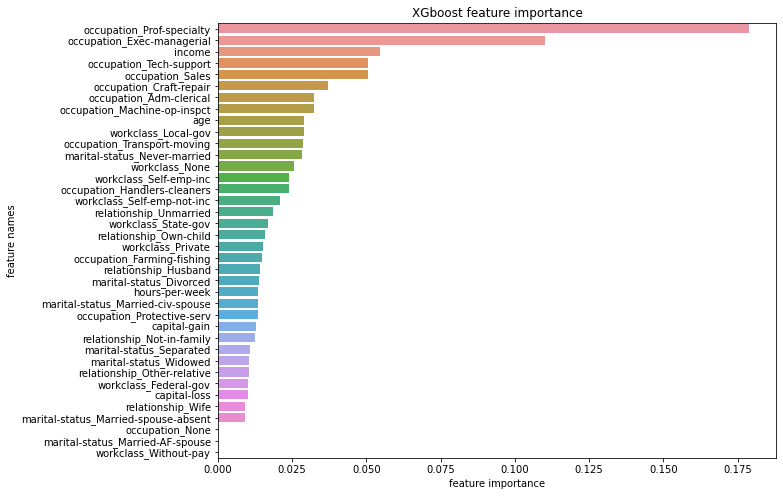

In [47]:
plot_feature_importance(xgb.feature_importances_, X_train.columns, 'XGboost')

In [48]:
X_train.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_None',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_None', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Ot

In [49]:
xgb.feature_importances_

array([0.02911011, 0.01293532, 0.01001622, 0.01346364, 0.05449923,
       0.01003804, 0.02894603, 0.02558032, 0.01512738, 0.02390403,
       0.02082296, 0.01689691, 0.        , 0.01398401, 0.        ,
       0.01334029, 0.00923465, 0.02813906, 0.01088617, 0.01054839,
       0.0325055 , 0.0369665 , 0.11006492, 0.01473633, 0.02378887,
       0.03218852, 0.        , 0.17896047, 0.01333411, 0.05050923,
       0.05064297, 0.02868802, 0.01401572, 0.01234785, 0.01043693,
       0.01569035, 0.01839399, 0.00925688], dtype=float32)

#### parameter tuning 모델 성능 비교

In [50]:
print(f'XGBoostClassifier 정확도 : ', accuracy_score(y_test, xgb_pred))
print(f'LightGBMBoostClassifier 정확도 : ', accuracy_score(y_test, lgb_pred))
print(f'CatBoostClassifier 정확도 : ', accuracy_score(y_test, cat_pred))

XGBoostClassifier 정확도 :  0.49295774647887325
LightGBMBoostClassifier 정확도 :  0.4732394366197183
CatBoostClassifier 정확도 :  0.4676056338028169


### VotingClassifier 앙상블 수행

In [54]:
# Catboost, LightGBM, XGBoost 보팅(소프트)
vo_soft_clf = VotingClassifier( estimators=[('CAT', cat), ('LGB', lgb), ('XGB', xgb)], voting='soft')

# VotingClassifier 학습, 예측, 정확도 계산
vo_soft_clf.fit(X_train, y_train)
soft_pred = vo_soft_clf.predict(X_test)
print('VotingClassifier Soft 정확도: {0:.4f}'.format(accuracy_score(y_test, soft_pred)))

[20:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier Soft 정확도: 0.4704


In [55]:
print('VotingClassifier Soft 정확도: {0:.4f}'.format(accuracy_score(y_test, soft_pred)))

VotingClassifier Soft 정확도: 0.4704
